## PRAICP-1002-TrafSignDetc

In [1]:
# General Purpose Libraries
import os
import zipfile
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

# Image Processing
from PIL import Image

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Deep Learning (TensorFlow/Keras)
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical


In [ ]:
# execute this only once... if you run again, skip this part
with zipfile.ZipFile("D:/Datamites Capstone Projects/AIE Project/TrafSignDetc/PRAICP-1002-TrafSignDetc.zip", 'r') as zip_ref:
    zip_ref.extractall("D:/Datamites Capstone Projects/AIE Project/TrafSignDetc/extracted_images")



In [2]:
# Fetching the data
imgs_path = "D:/Datamites Capstone Projects/AIE Project/TrafSignDetc/extracted_images/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

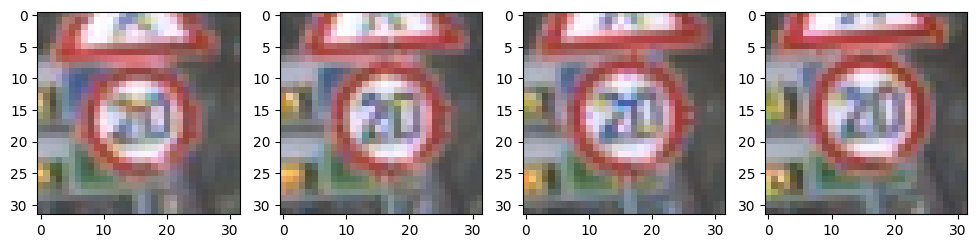

In [3]:
# Visualizing the data
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [4]:
# data preprocessing
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [5]:
# Splitting the data
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

In [6]:
# Defining the model
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

c:\Python3.12.4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4000)           │    32,772,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4000)           │    16,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        43,043 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,810,763 (212.90 MB)

 Trainable params: 55,809,419 (212.90 MB)

 Non-trainable params: 1,344 (5.25 KB)

c:\Python3.12.4\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


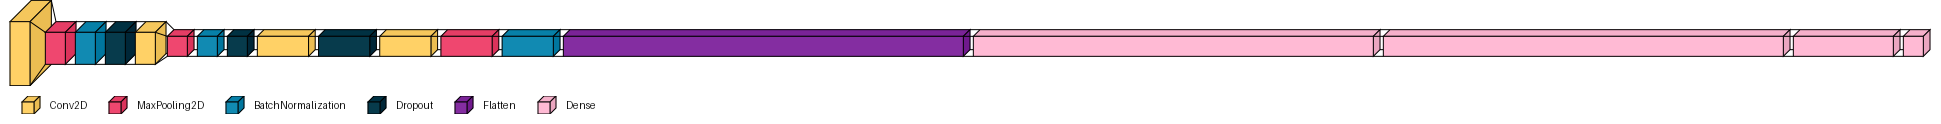

In [ ]:
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [9]:
# Compiling the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 347s 699ms/step - accuracy: 0.3180 - loss: 2.9586 - val_accuracy: 0.8689 - val_loss: 0.4127
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 358s 729ms/step - accuracy: 0.8914 - loss: 0.3453 - val_accuracy: 0.9681 - val_loss: 0.0980
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 344s 701ms/step - accuracy: 0.9616 - loss: 0.1273 - val_accuracy: 0.9561 - val_loss: 0.1436
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 340s 693ms/step - accuracy: 0.9748 - loss: 0.0855 - val_accuracy: 0.9832 - val_loss: 0.0987
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 341s 695ms/step - accuracy: 0.9739 - loss: 0.0964 - val_accuracy: 0.9811 - val_loss: 0.0814
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 341s 695ms/step - accuracy: 0.9781 - loss: 0.0802 - val_accuracy: 0.9872 - val_loss: 0.1370
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 337s 685ms/step - accuracy: 0.9830 - loss: 0.0642 - val_accuracy: 0.9857 - val_loss: 0.0550
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 337s 687ms/step - accuracy: 0.9812 -

Text(0.5, 1.0, 'Loss')

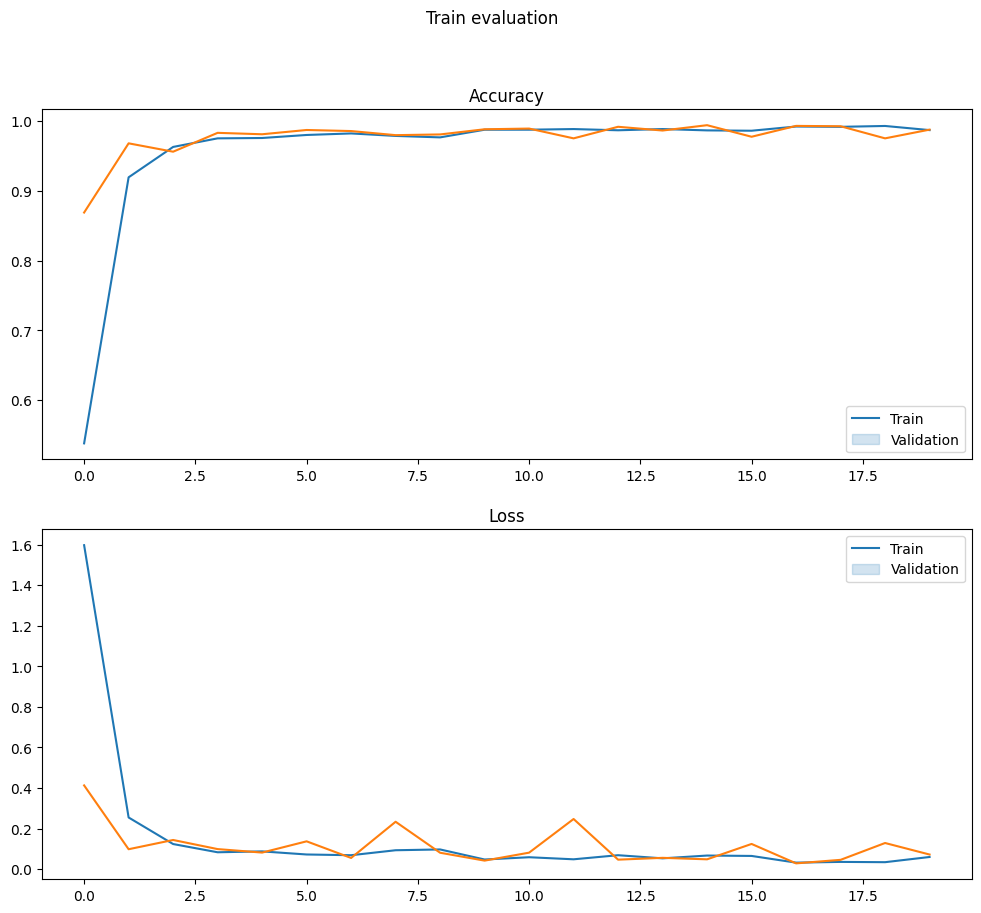

In [10]:
# Visualizing the results
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [11]:
# Testing the model
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step
-Acuracy achieved: 99.26%
-Accuracy by model was: 98.71%
-Accuracy by validation was: 98.78%


In [12]:
# Saving the model
model.save('my_model.keras')